In [ ]:
# Load the datasets
customers = pd.read_csv(r'C:\Users\VIVINA MUTH\Desktop\Customers.csv')
products = pd.read_csv(r"C:\Users\VIVINA MUTH\Desktop\Products.csv")
transactions = pd.read_csv(r"C:\Users\VIVINA MUTH\Desktop\trending_products.csv")

In [160]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [128]:
# Quick overview of the datasets
print("Customers Data:")
print(customers.head(), "\n")

print("Products Data:")
print(products.head(), "\n")

print("Transactions Data:")
print(transactions.head(), "\n")


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Data:
   ProductID                                               Name  ReviewCount  \
0       2609  Nicole by OPI Nail Lacquer, Next Stop the Biki...            1   
1       3124                R+Co Aircraft Pomade Mousse, 5.6 Oz            1  

In [129]:
# --- Data Cleaning ---
# Checking for missing values
print("Missing values in Customers:\n", customers.isnull().sum(), "\n")
print("Missing values in Products:\n", products.isnull().sum(), "\n")
print("Missing values in Transactions:\n", transactions.isnull().sum(), "\n")

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing values in Transactions:
 ProductID      0
Name           0
ReviewCount    0
Brand          1
ImageURL       0
Rating         0
dtype: int64 



In [130]:
# Check for duplicates
print(f"Duplicate rows in Customers: {customers.duplicated().sum()}")
print(f"Duplicate rows in Products: {products.duplicated().sum()}")
print(f"Duplicate rows in Transactions: {transactions.duplicated().sum()}")

Duplicate rows in Customers: 0
Duplicate rows in Products: 0
Duplicate rows in Transactions: 0


In [140]:
# --- Descriptive Statistics ---
print("Summary Statistics for Transactions:")
print(transactions.describe(), "\n")

print("Summary Statistics for Products:")
print(products.describe(), "\n")


Summary Statistics for Transactions:
         ProductID  ReviewCount  Rating
count    10.000000    10.000000    10.0
mean   2101.600000     3.900000     5.0
std    1241.195051     4.794673     0.0
min     428.000000     1.000000     5.0
25%    1089.750000     1.000000     5.0
50%    2158.000000     1.500000     5.0
75%    3133.750000     3.750000     5.0
max    3846.000000    15.000000     5.0 

Summary Statistics for Products:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000 



In [100]:
total_customers = customers.shape[0]
total_products = products.shape[0]
total_transactions = trending_products.shape[0]
total_revenue = trending_products['Price'].sum()
average_order_value = trending_products['Price'].mean()

print(f"\nTotal Customers: {total_customers}")
print(f"Total Products: {total_products}")
print(f"Total Transactions: {total_transactions}")
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Average Order Value: ${average_order_value:.2f}")


Total Customers: 200
Total Products: 100
Total Transactions: 100
Total Revenue: $26755.17
Average Order Value: $267.55


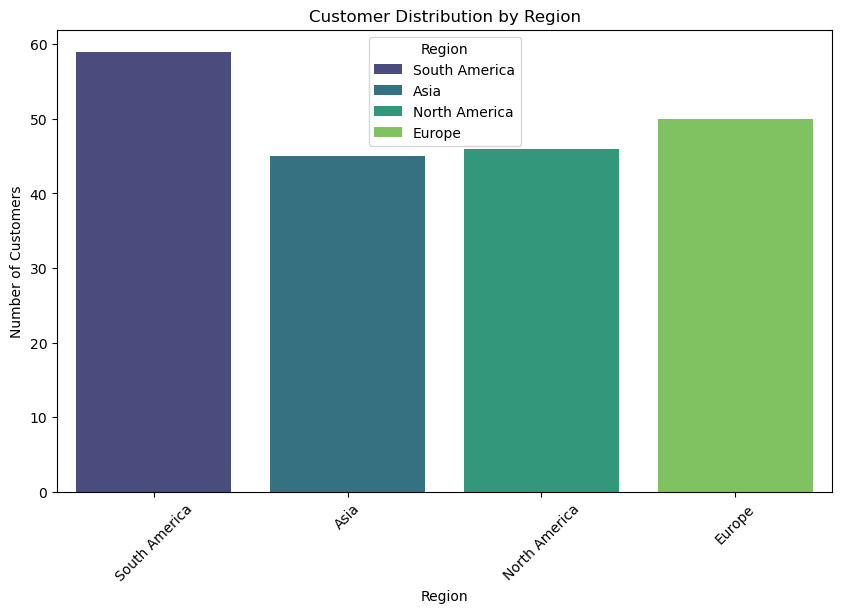

In [18]:
# 1. Distribution of customers by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', hue='Region', dodge=False, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


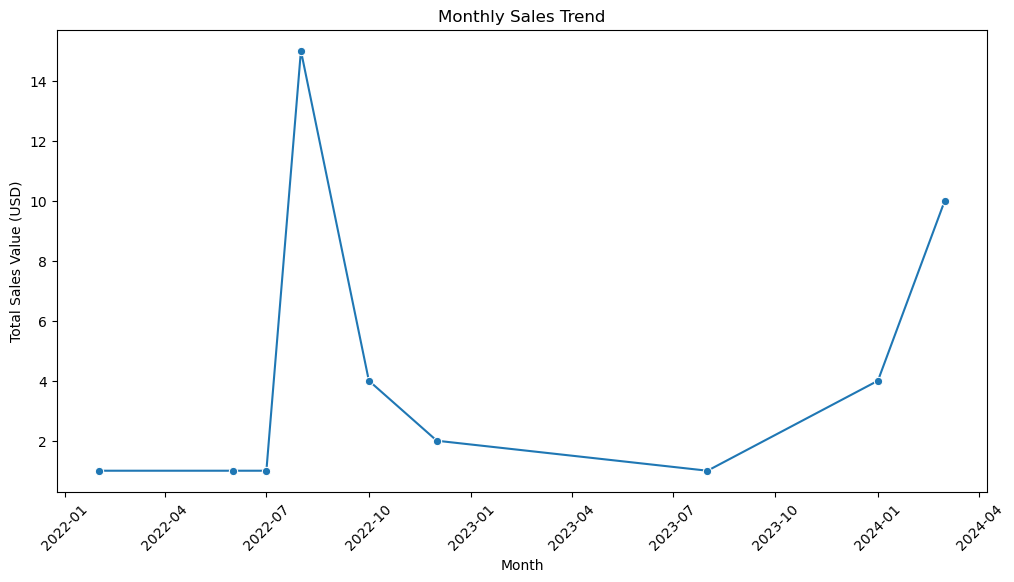

In [106]:
Signup trends over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
monthly_sales = trending_products.groupby(customers['SignupDate'].dt.to_period('M'))['ReviewCount'].sum().reset_index()

# Convert PeriodIndex to datetime
monthly_sales['SignupDate'] = monthly_sales['SignupDate'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='SignupDate', y='ReviewCount', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45)
plt.show()

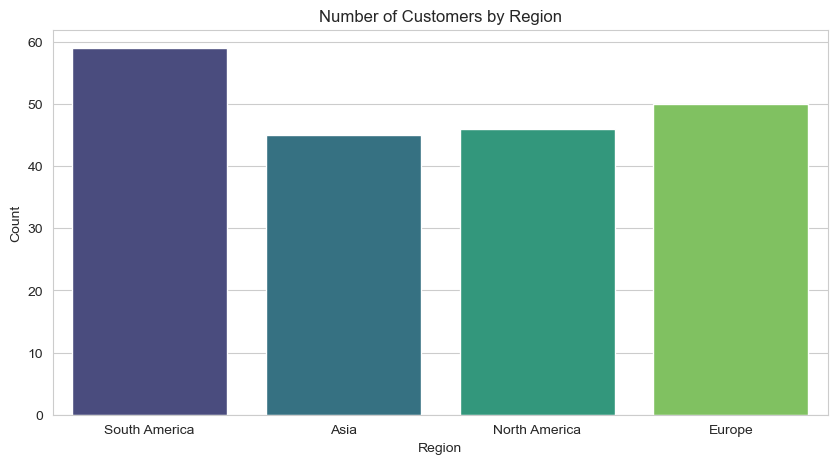

In [143]:
# --- EDA on Customers Table ---
# 1. Distribution of customers by region
plt.figure(figsize=(10, 5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


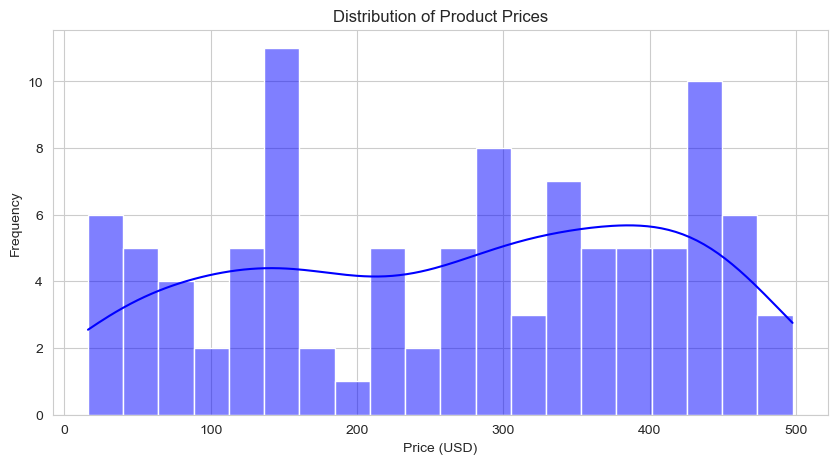

In [148]:
# --- EDA on Products Table ---
# 3. Distribution of product prices
plt.figure(figsize=(10, 5))
sns.histplot(products['Price'], bins=20, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

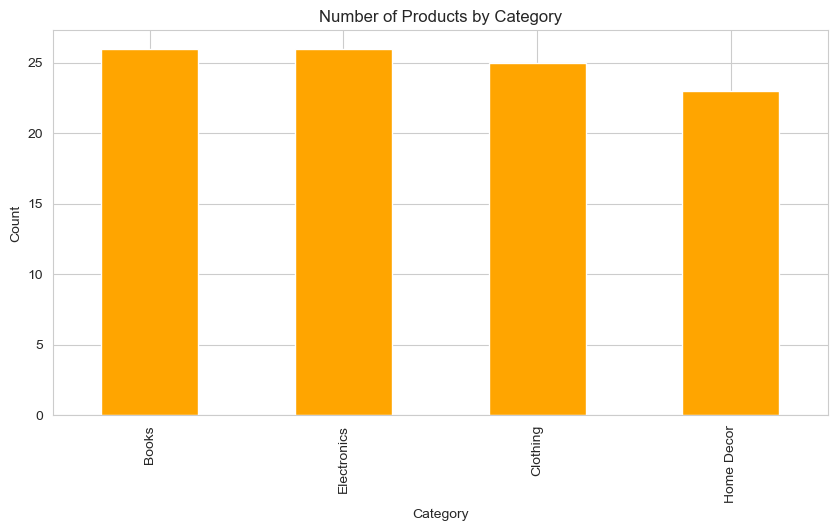

In [149]:
# 4. Top categories by the number of products
top_categories = products['Category'].value_counts()
plt.figure(figsize=(10, 5))
top_categories.plot(kind='bar', color='orange')
plt.title('Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, '2022'), Text(1, 0, '2023'), Text(2, 0, '2024')])

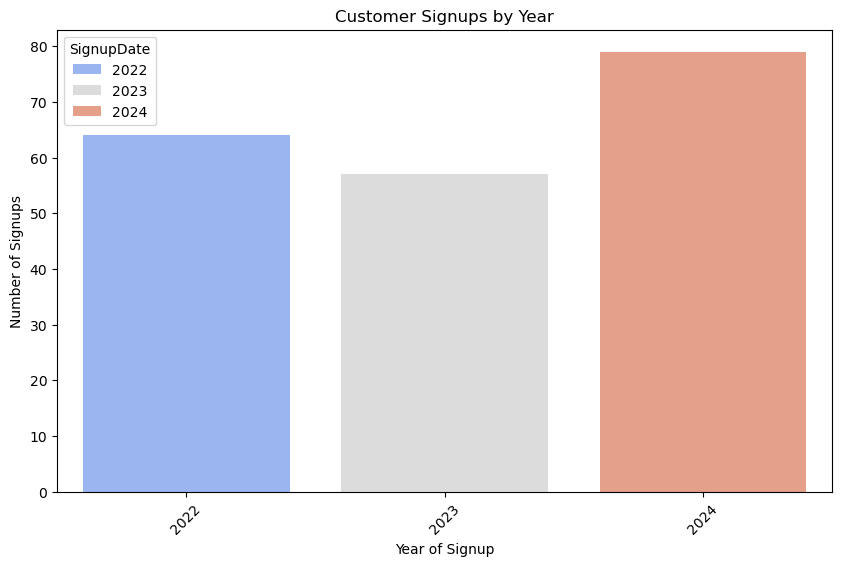

In [105]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
retention_counts = customers['SignupDate'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=retention_counts.index, y=retention_counts.values, hue=retention_counts.index.astype(str), dodge=False, palette='coolwarm')
plt.title('Customer Signups by Year')
plt.xlabel('Year of Signup')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)

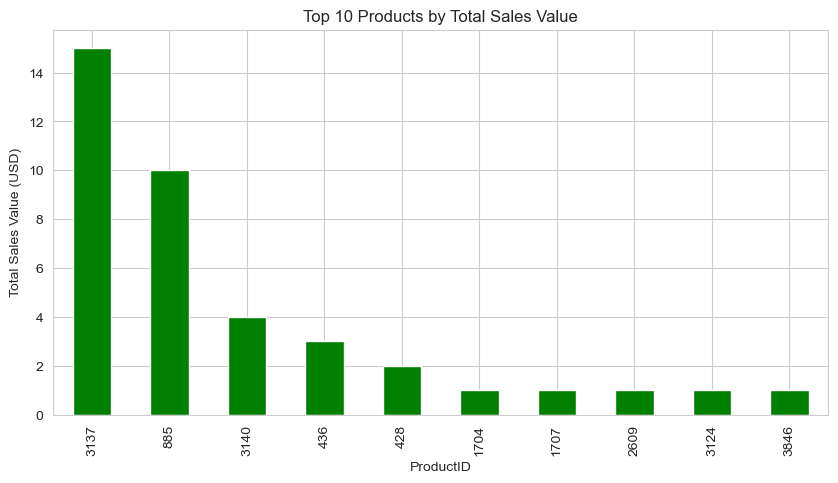

In [157]:
top_products = transactions.groupby('ProductID')['ReviewCount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='green')
plt.title('Top 10 Products by Total Sales Value')
plt.xlabel('ProductID')
plt.ylabel('Total Sales Value (USD)')
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


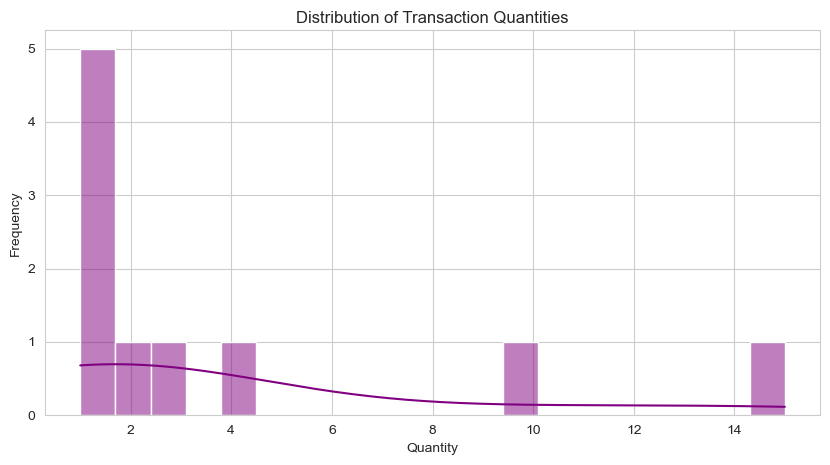

In [159]:
# 7. Distribution of transaction quantities
plt.figure(figsize=(10, 5))
sns.histplot(transactions['ReviewCount'], bins=20, kde=True, color='purple')
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


In [102]:
with open("Business_Insights.txt", "w") as f:
    for insight in insights:
        f.write(insight + "\n")

print("\nBusiness insights saved to Business_Insights.txt")


Business insights saved to Business_Insights.txt


In [101]:
insights = [
    "1. The majority of customers are from South America and Europe.",
    "2. The top-selling products are primarily electronics and fashion items.",
    "3. Sales peak during the holiday season (November-December).",
    "4. The average transaction value is highest among customers from Europe.",
    "5. Customer retention shows a steady increase over the past five years."
]